In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
import plotly.express as px
import plotly.io as pio


In [30]:
# diff = "nodiff"
diff = "5percent"
pressure = 1

# Set the detector size depending on the pressure
det_size = int(np.cbrt(6000**3/pressure)/2.0) 
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_{pressure}bar_{diff}_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# ----------------------------------------------------------------------------------------------------

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_reco.h5", "meta")
Bi_meta["Type"] = "Bi"
Bkg_meta = pd.concat([Tl_meta, Bi_meta])
display(Bkg_meta)

# ----------------------------------------------------------------------------------------------------
# Load in the files for plotting the background events

Tl                = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_reco.h5",    "data")
Tl_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_nexus_filtered.h5", "MC/hits")
Tl_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_nexus_filtered.h5", "MC/particles")

Bi                = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_reco.h5",    "data")
Bi_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_nexus_filtered.h5", "MC/hits")
Bi_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_nexus_filtered.h5", "MC/particles")

Tl_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_filtered.h5", "MC/hits")
Bi_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_filtered.h5", "MC/hits")


# Shift the positions
Tl["Type"] = "Tl"
Bi["Type"] = "Bi"
Tl_true_hits["z"] = Tl_true_hits["z"] + det_size
Bi_true_hits["z"] = Bi_true_hits["z"] + det_size

Bkg            =  pd.concat([Tl, Bi])
Bkg_true_hits  =  pd.concat([Tl_true_hits, Bi_true_hits])
Bkg_true_parts =  pd.concat([Tl_true_parts, Bi_true_parts])
Bkg_diffused_hits = pd.concat([Tl_diffused_hits, Bi_diffused_hits])

# ----------------------------------------------------------------------------------------------------
# Load in the pickle files
bi_file = f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_trackreco.pkl"
tl_file = f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_trackreco.pkl"

# Load Bi data
with open(bi_file, 'rb') as pickle_file:
    Tracks_Bi = pickle.load(pickle_file)
    connections_Bi = pickle.load(pickle_file)
    connection_counts_Bi = pickle.load(pickle_file)

# Load Tl data
with open(tl_file, 'rb') as pickle_file:
    Tracks_Tl = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)

# Merge dictionaries
Bkg_Tracks = {**Tracks_Bi, **Tracks_Tl}
Bkg_connections = {**connections_Bi, **connections_Tl}
Bkg_connection_counts = {**connection_counts_Bi, **connection_counts_Tl}

# ----------------------------------------------------------------------------------------------------




3000


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,...,Tortuosity1,Tortuosity2,TortuosityA1,TortuosityA2,Squiglicity1,Squiglicity2,SquiglicityA1,SquiglicityA2,label,Type
0,150,0,1,24,185,3464.721,2.464178,0.551725,0.385958,0.760964,...,3.470056,2.035707,635.967496,409.119741,2.388284e+00,1.967882e+00,4.364851e+02,4.032777e+02,Primary,0nubb
0,151,0,1,169,90,3385.803,2.306095,0.625598,0.503768,0.543012,...,1.446712,4.052653,275.307359,813.979476,1.000880e+00,1.891861e+00,1.971567e+02,3.880520e+02,Primary,0nubb
0,151,1,0,176,176,0.000,0.034404,0.034404,0.034404,0.034404,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Brem,0nubb
0,151,2,0,165,166,25.271,0.118048,0.118048,0.118048,0.118048,...,1.666797,1.666797,42.122346,42.122346,8.881619e-01,8.881619e-01,2.244512e+01,2.244512e+01,Brem,0nubb
0,152,0,1,103,11,3650.874,2.450860,0.598870,0.586332,0.509041,...,1.807458,2.809599,317.289587,505.619299,1.344896e+00,1.867816e+00,2.379893e+02,3.504094e+02,Primary,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1558,1,0,68,67,72.804,0.204237,0.204237,0.204237,0.000000,...,1.431425,1.431425,52.426959,52.426959,5.593600e-01,5.593600e-01,2.048696e+01,2.048696e+01,Delta0,0nubb
0,1558,2,0,77,75,182.268,0.062583,0.062583,0.062583,0.000000,...,1.000000,1.000000,85.440886,85.440886,1.029076e-16,1.029076e-16,8.792518e-15,8.792518e-15,Delta0,0nubb
0,1559,0,1,91,59,2588.656,1.693013,0.515596,0.405231,0.428313,...,3.103804,1.924429,649.378884,372.623811,2.204401e+00,1.427288e+00,4.669883e+02,2.818691e+02,Primary,0nubb
0,1559,1,0,72,71,48.748,0.088691,0.088691,0.088691,0.000000,...,1.266600,1.266600,31.292405,31.292405,4.719646e-01,4.719646e-01,1.166027e+01,1.166027e+01,Delta0,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,...,Tortuosity1,Tortuosity2,TortuosityA1,TortuosityA2,Squiglicity1,Squiglicity2,SquiglicityA1,SquiglicityA2,label,Type
0,35335000,0,1,46,99,3535.318,2.104415,0.534644,0.250697,0.798611,...,2.403942,1.148135,450.495104,202.886809,1.531182e+00,5.072110e-01,2.780540e+02,8.995424e+01,Primary,Tl
0,35335000,1,0,100,101,34.358,0.186231,0.186231,0.186231,0.186231,...,1.527285,1.527285,52.474124,52.474124,6.327108e-01,6.327108e-01,2.173854e+01,2.173854e+01,Brem,Tl
0,35335000,2,0,49,52,18.043,0.067958,0.067958,0.067958,0.067958,...,1.000000,1.000000,18.042565,18.042565,9.850174e-17,9.850174e-17,1.777224e-15,1.777224e-15,Brem,Tl
0,35335001,0,1,154,62,3773.164,2.355107,0.524260,0.230393,0.565982,...,2.409995,1.031801,459.643247,199.240275,1.964545e+00,1.651601e-01,3.919170e+02,3.057663e+01,Primary,Tl
0,35335002,0,1,78,38,2777.291,1.921513,0.621635,0.217684,0.833615,...,3.419766,1.039901,722.343412,204.189779,2.334837e+00,3.486239e-01,4.979831e+02,6.988274e+01,Primary,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1100058,0,1,129,79,3265.576,2.116349,0.638492,0.230721,0.702199,...,2.017797,1.053297,395.423116,181.374215,1.563474e+00,3.846358e-01,3.061445e+02,6.445123e+01,Primary,Bi
0,1100058,1,0,6,6,0.000,0.020781,0.020781,0.020781,0.020781,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Brem,Bi
0,1100058,2,0,0,3,148.024,0.317029,0.317029,0.317029,0.317029,...,1.821919,1.821919,269.687901,269.687901,1.395234e+00,1.395234e+00,2.065283e+02,2.065283e+02,Brem,Bi
0,1100059,0,1,79,118,2427.008,1.823292,0.643290,0.205901,0.579212,...,1.904947,1.069487,351.364817,177.632270,1.307823e+00,4.310675e-01,2.499654e+02,6.987628e+01,Primary,Bi


In [31]:
nubb_events = len(nubb_meta.event_id.unique())
Bkg_events = len(Bkg_meta.event_id.unique())

print(nubb_events)
print(Bkg_events)

166316
340638


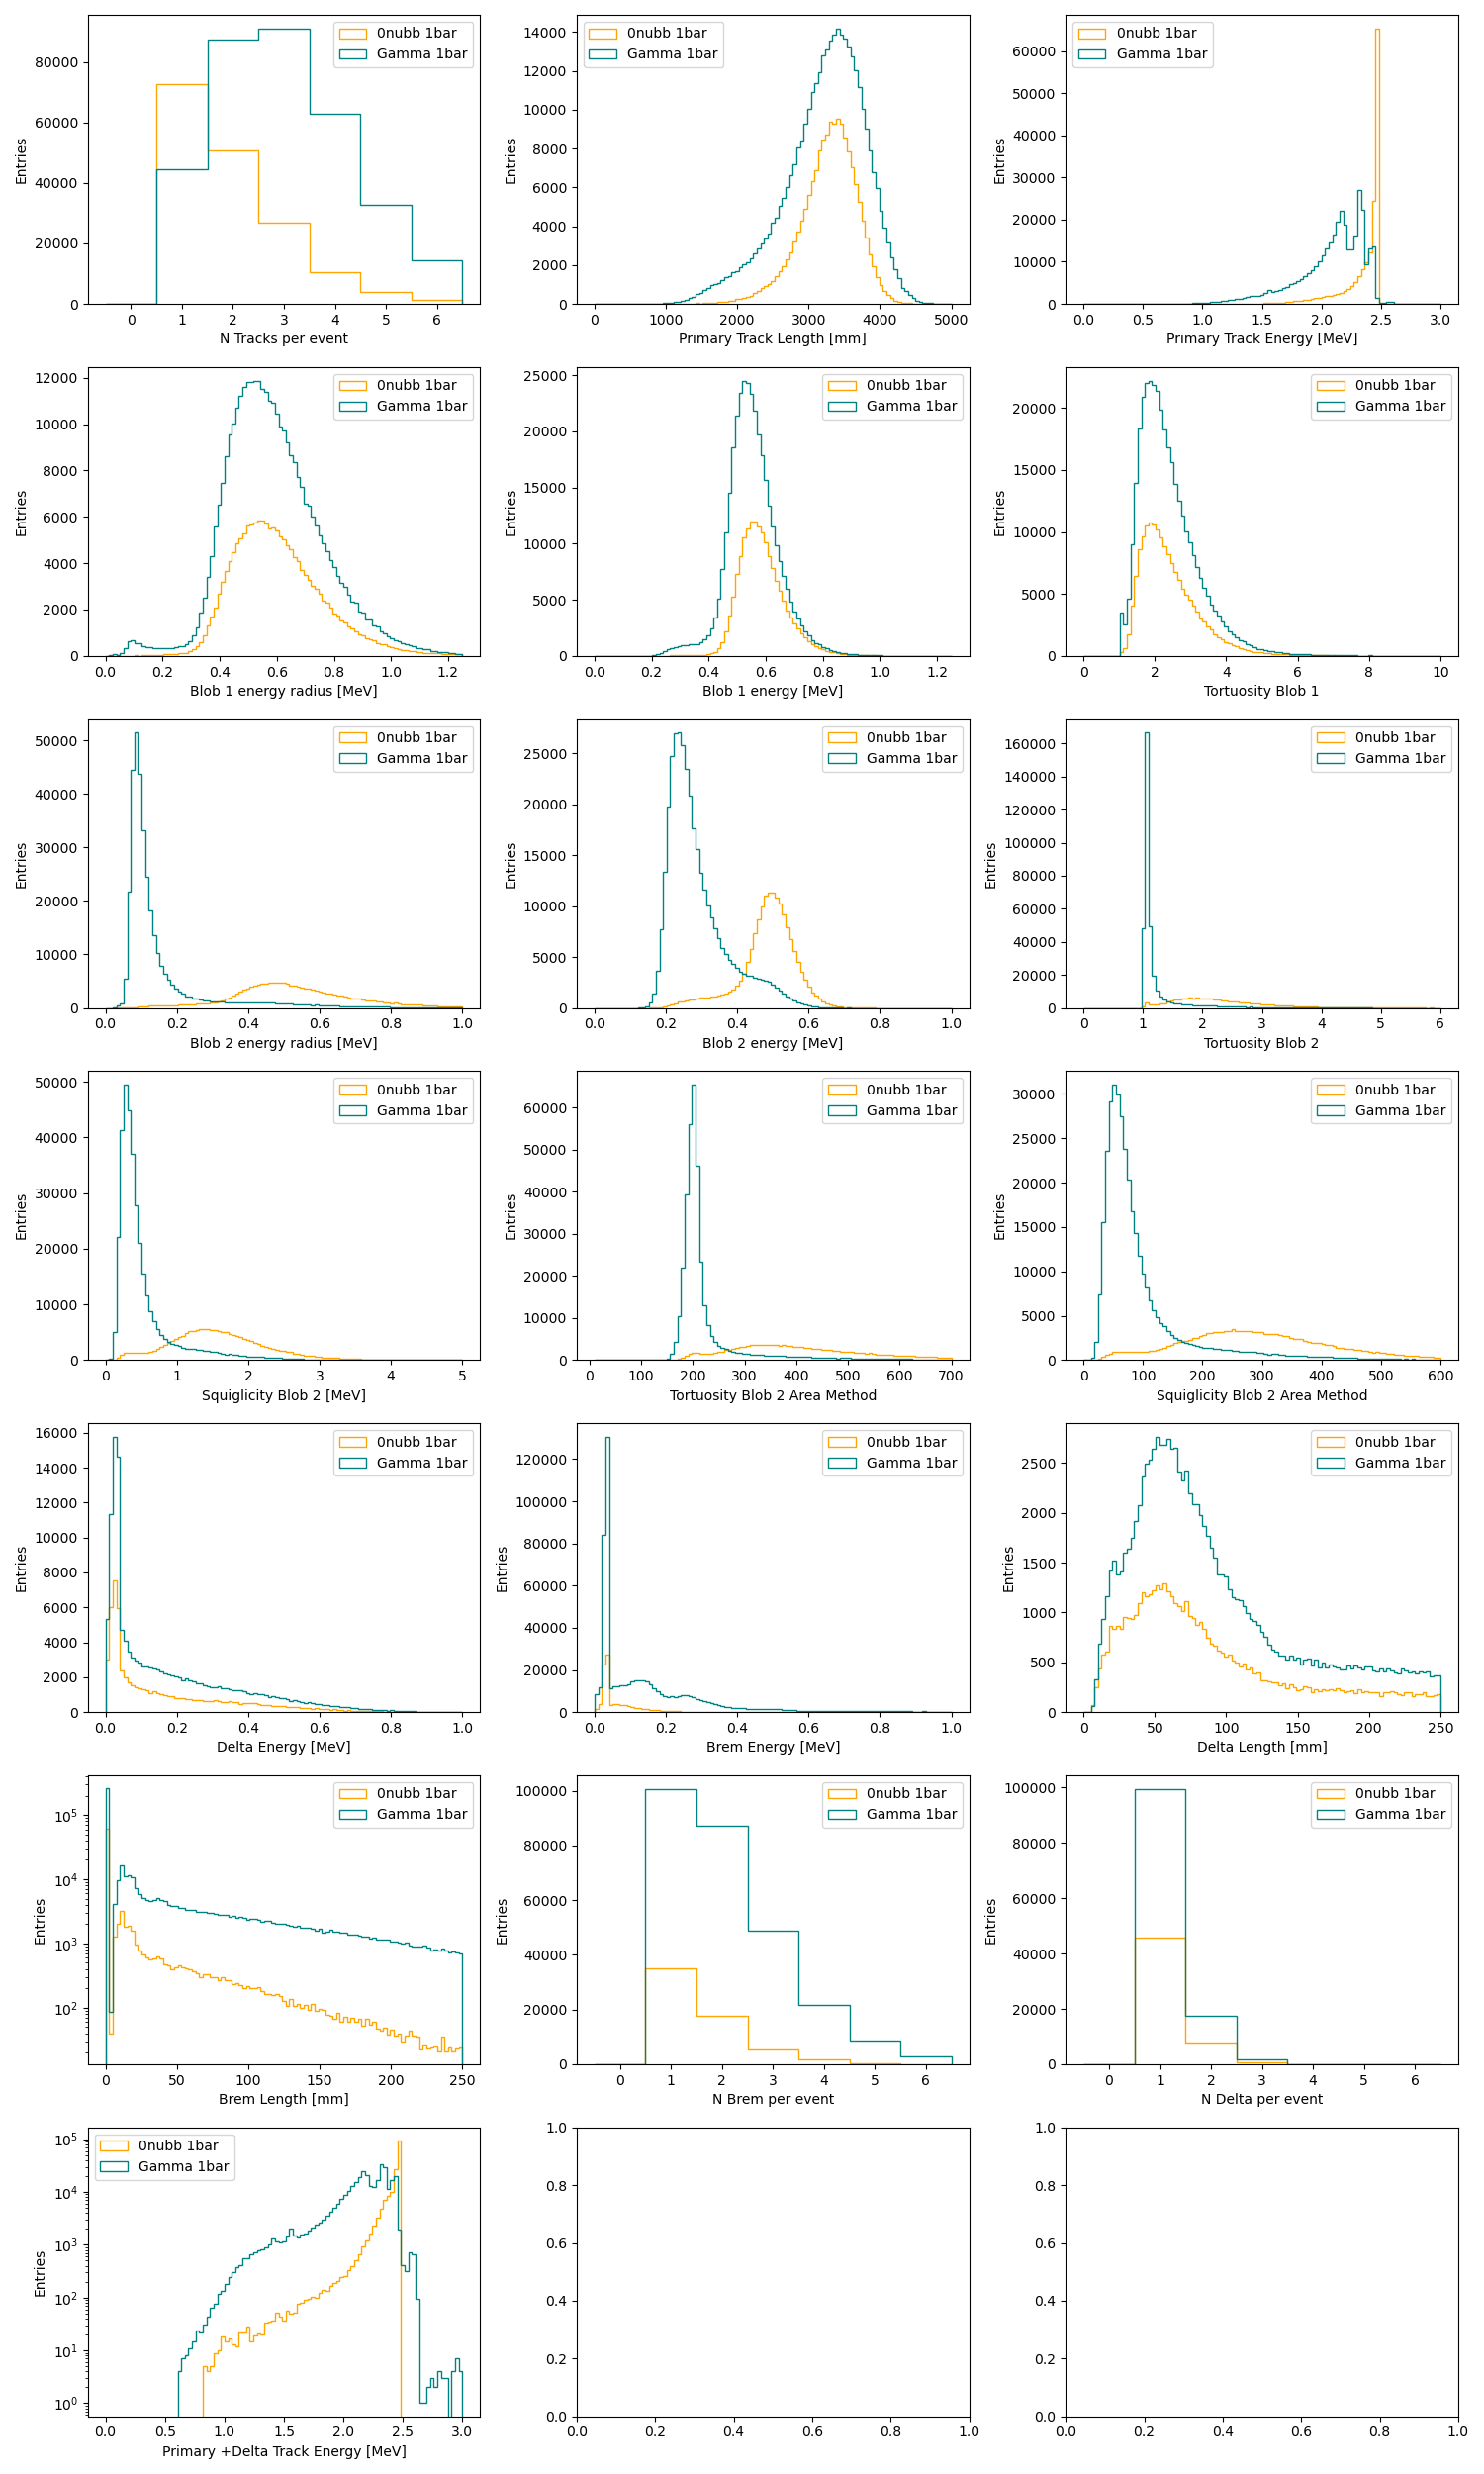

In [32]:
# Plot some variables like number of tracks
%matplotlib widget

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values


def PlotDistributions(df_meta, col, label, scale_factor):

    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    weights = np.ones_like(df_counts) * scale_factor

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()


    df_primary = df_meta[df_meta.primary == 1]

    weights = np.ones_like(df_primary.energy) * scale_factor

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length [mm]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()

    axs[3,1].hist(df_primary.TortuosityA2, bins = np.linspace(10, 700, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Blob 2 Area Method")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()

    axs[3,2].hist(df_primary.SquiglicityA2, bins = np.linspace(0, 600, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Blob 2 Area Method")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    axs[6,0].semilogy()

    plt.tight_layout()


fig, axs = plt.subplots(7, 3, figsize=(15, 25))

PlotDistributions(nubb_meta, "orange", "0nubb 1bar", 1)
PlotDistributions(Bkg_meta, "Teal", "Gamma 1bar", 1)



Efficiency nubb: 30.26  +/- 0.11 %
Bkg Rej: Bkg: 0.22 +/- 0.01 %      (bkg rej == 99.78 %)
FOM: 6.4568338361939945


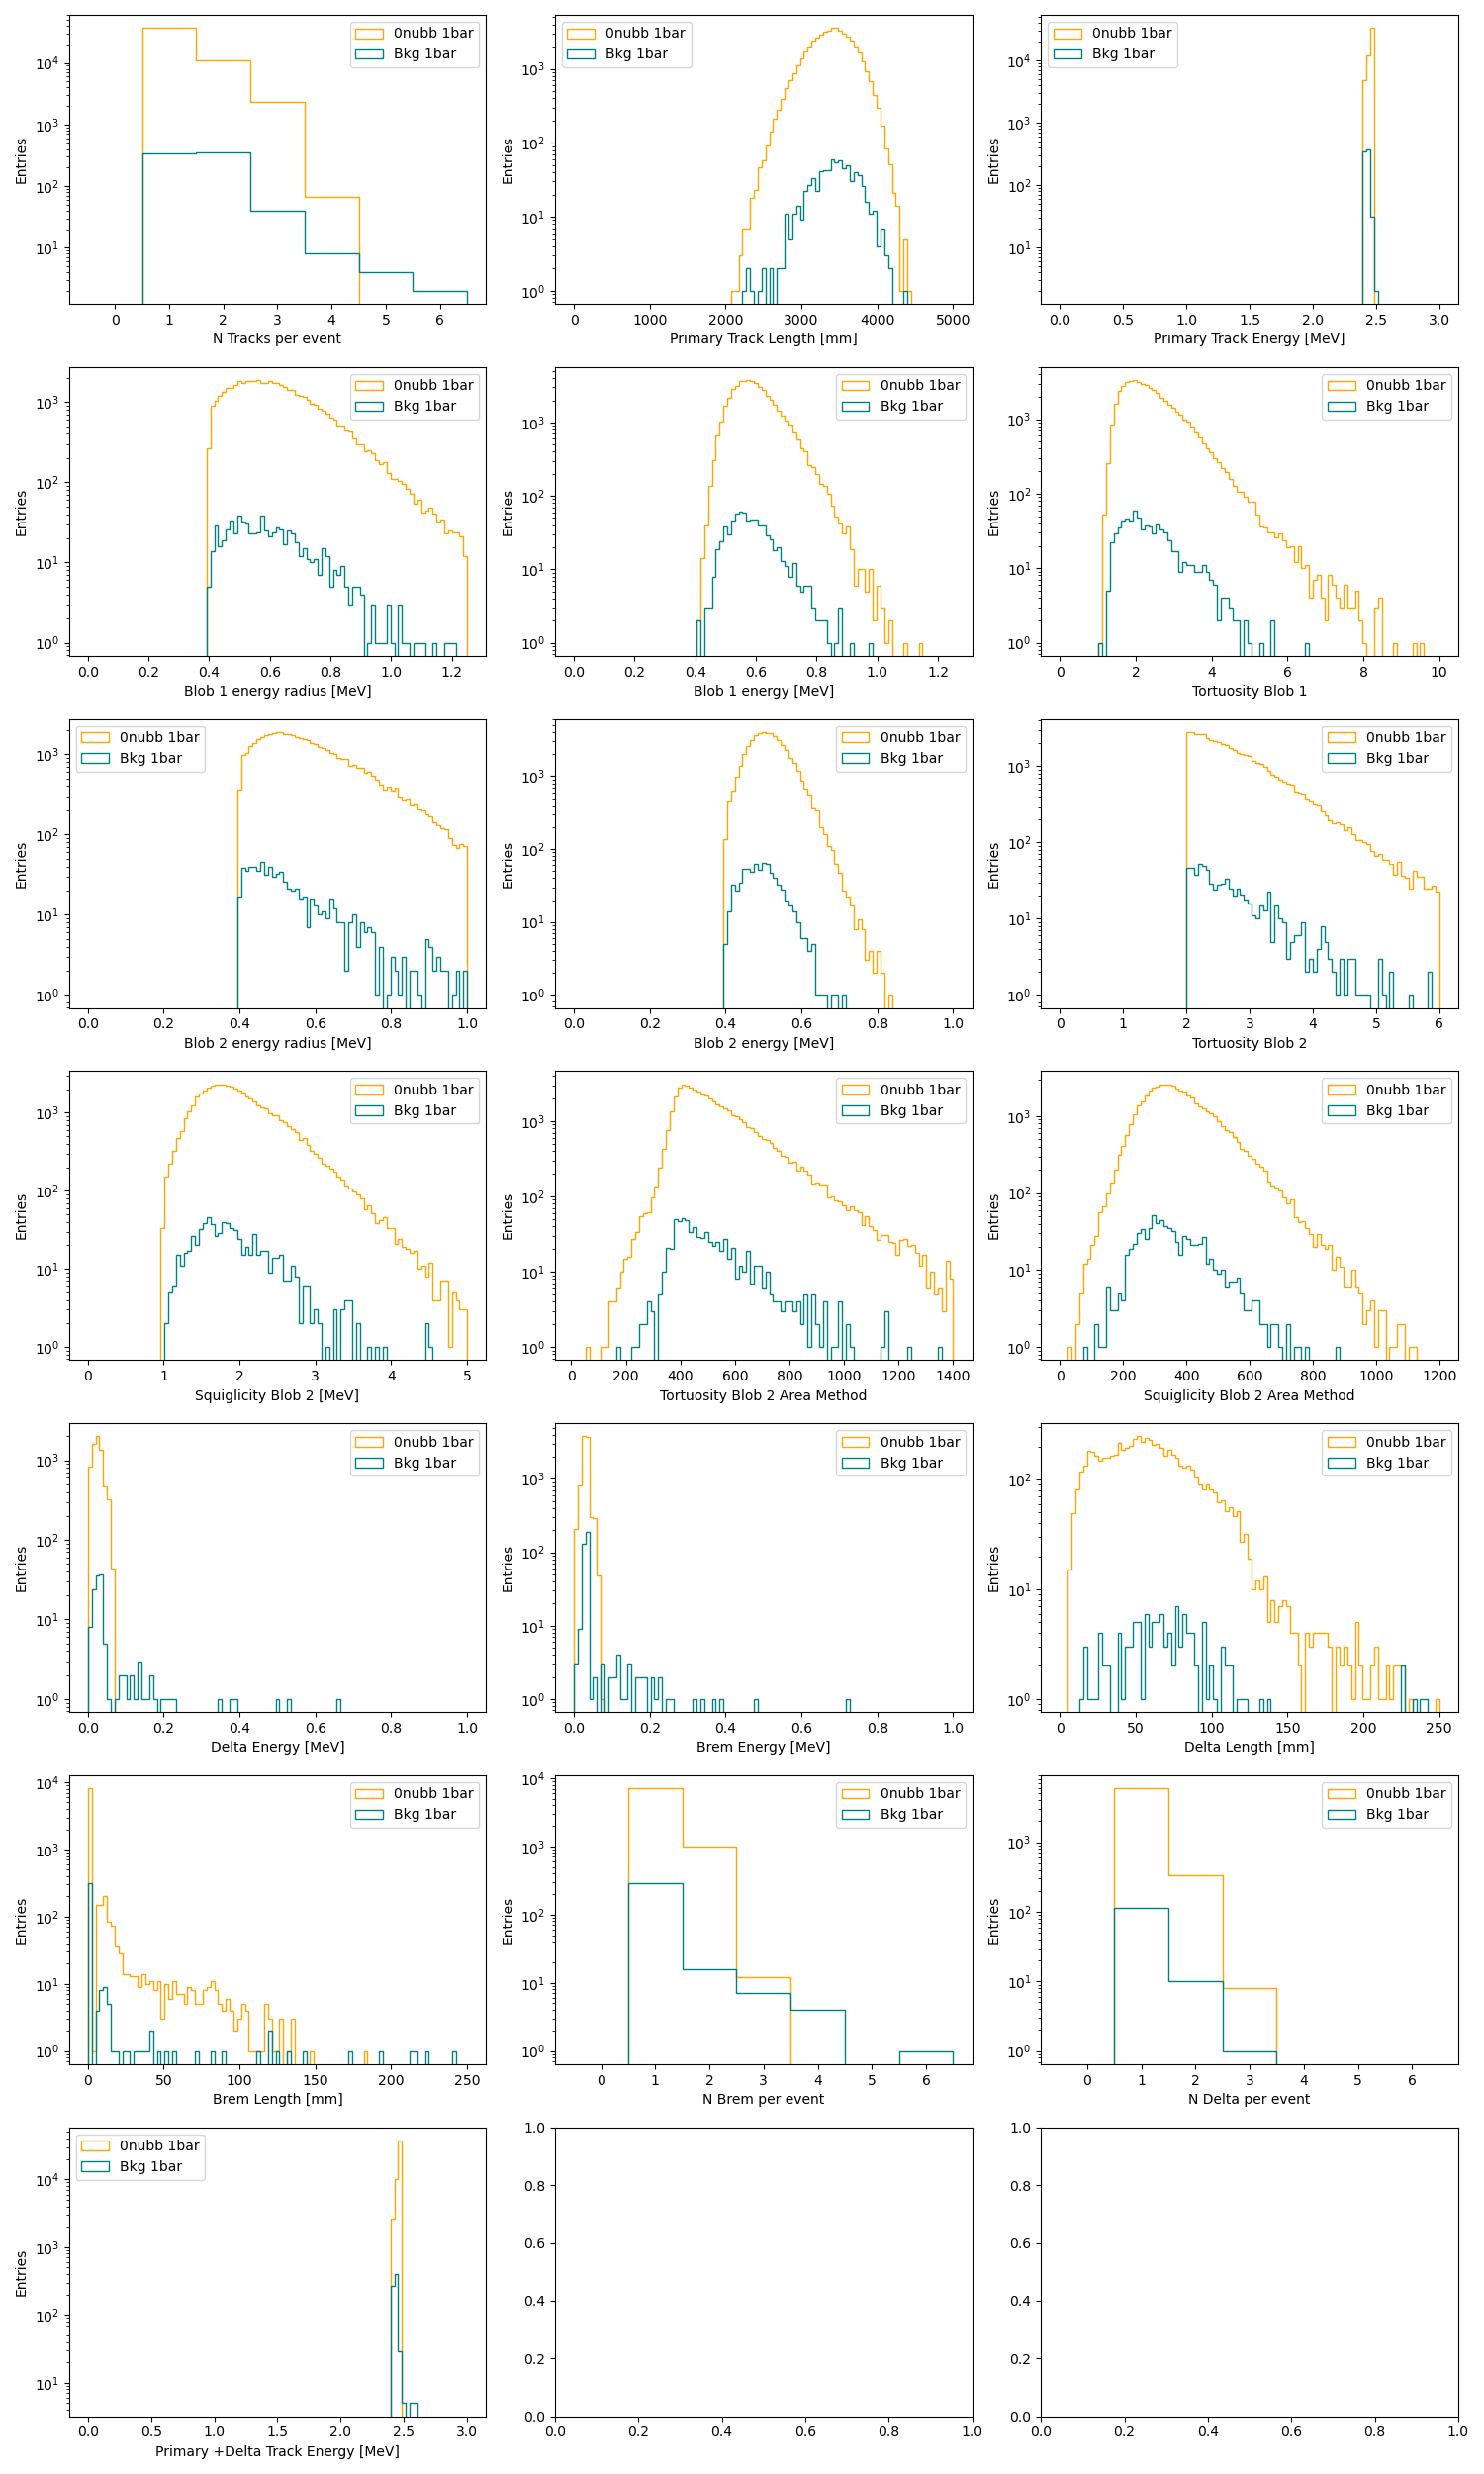

In [66]:
def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label):
    efficiency = n/N
    error=np.sqrt( (efficiency/N) * (1-efficiency)  )

    if (label == "Bkg"):
        print(f"Bkg Rej: {label}:", round(100*efficiency, 2), "+/-", round(100*error,2),  "%", "     (bkg rej ==", round(100-100*efficiency,2), "%)")
    else:
        print(f"Efficiency {label}:",  round(100*efficiency, 2), " +/-", round(100*error,2),  "%")

    return efficiency, error


# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio


def PlotDistributionswithCuts(df_meta, col, label, scale_factor):

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]
    
    # no diff
    # cuts = (df_primary.blob2R > 0.32) & \
    #        (df_primary.blob1R > 0.32) & \
    #        (df_primary.energy > 2.15) & \
    #        (df_primary.Squiglicity2 > 2) & \
    #        (df_primary.Tortuosity2 > 2)

    # 5 percenr
    cuts = (df_primary.blob2R > 0.4) & \
           (df_primary.blob2 > 0.4) & \
           (df_primary.blob1R > 0.4) & \
           (df_primary.energy > 2.4) & \
           (df_primary.energy < 2.5) & \
           (df_primary.Tortuosity2 > 2) & \
           (df_primary.Squiglicity2 > 1)

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    weights = np.ones_like(df_primary.energy) * scale_factor


    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length [mm]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.TortuosityA2, bins = np.linspace(10, 1400, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Blob 2 Area Method")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.SquiglicityA2, bins = np.linspace(0, 1200, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Blob 2 Area Method")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return df_primary.event_id.unique()



fig, axs = plt.subplots(7, 3, figsize=(15, 25))

nubb_cut = PlotDistributionswithCuts(nubb_meta, "orange", "0nubb 1bar", 1)
Bkg_cut = PlotDistributionswithCuts(Bkg_meta, "Teal", "Bkg 1bar", 1)

nubb_cut_num = len(nubb_cut)
Bkg_cut_num = len(Bkg_cut)


nubb_eff, nubb_err =  CalcEfficiency(nubb_cut_num, nubb_events, "nubb")
Bkg_eff, Bkg_err =  CalcEfficiency(Bkg_cut_num, Bkg_events, "Bkg")

# print("nubb: ", nubb_events, nubb_cut_num, 100*nubb_cut_num/nubb_events)
# print("Bkg: ", Bkg_events, Bkg_cut_num, 100-100*Bkg_cut_num/Bkg_events)
print("FOM:", FOM(nubb_cut_num/nubb_events, Bkg_cut_num/Bkg_events))


# To plot:
# Get the number of x-rays in the event and plot that vs the number of tracks in the event. gammas should have a 1 to 1 correspondance, whereas signal should be reduced.
# tracking algo: new function to group clusters and then only connect based on the grouped clusters. This clustering should first be binned then labelled based on the proximity.  
# add x-ray label to the label tree other than brem


748
{0: [1, 2], 1: [0, 3], 2: [0, 4], 3: [1, 9], 4: [2, 8], 5: [6, 7], 6: [5, 8], 7: [10, 5], 10: [7, 11], 8: [4, 6], 9: [3, 12], 11: [10, 14], 12: [13, 9], 13: [12, 15], 15: [13, 17], 14: [18, 11], 18: [14, 20], 17: [15, 16], 16: [19, 17], 19: [16], 20: [18, 21], 21: [20, 22], 22: [21, 23], 23: [26, 22], 26: [23, 28], 24: [29, 27], 29: [24, 30], 25: [28, 27], 28: [25, 26], 27: [25, 24], 30: [31, 29], 31: [30, 32], 32: [31, 33], 33: [34, 32], 34: [33, 35], 35: [36, 34], 36: [35, 37], 37: [39, 36], 39: [37, 38], 38: [39, 40], 40: [41, 38], 41: [40, 42], 42: [41, 45], 43: [44, 45], 44: [43, 46], 46: [44, 47], 45: [43, 42], 47: [48, 46], 48: [47, 49], 49: [48, 51], 50: [51, 52], 51: [50, 49], 52: [50, 53], 53: [52, 54], 54: [55, 53], 55: [54, 56], 56: [57, 55], 57: [56, 58], 58: [57, 59], 59: [58, 60], 60: [59, 61], 61: [62, 60], 62: [61, 63], 63: [62, 64], 64: [63, 65], 65: [66, 64], 66: [65, 67], 67: [68, 66], 68: [67, 69], 69: [68, 70], 70: [71, 69], 71: [70, 72], 72: [71, 73], 73: [74

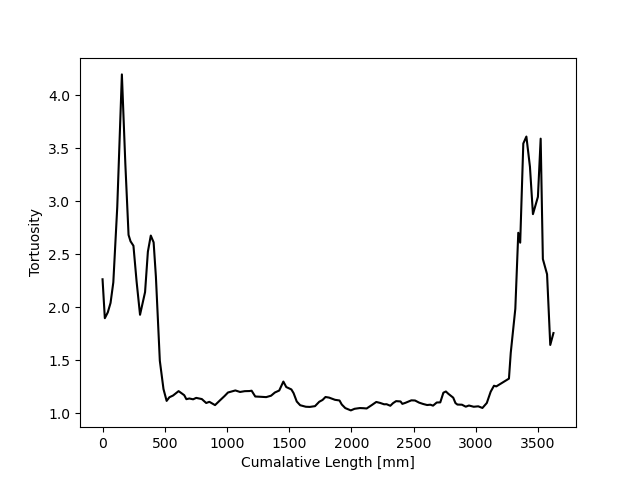

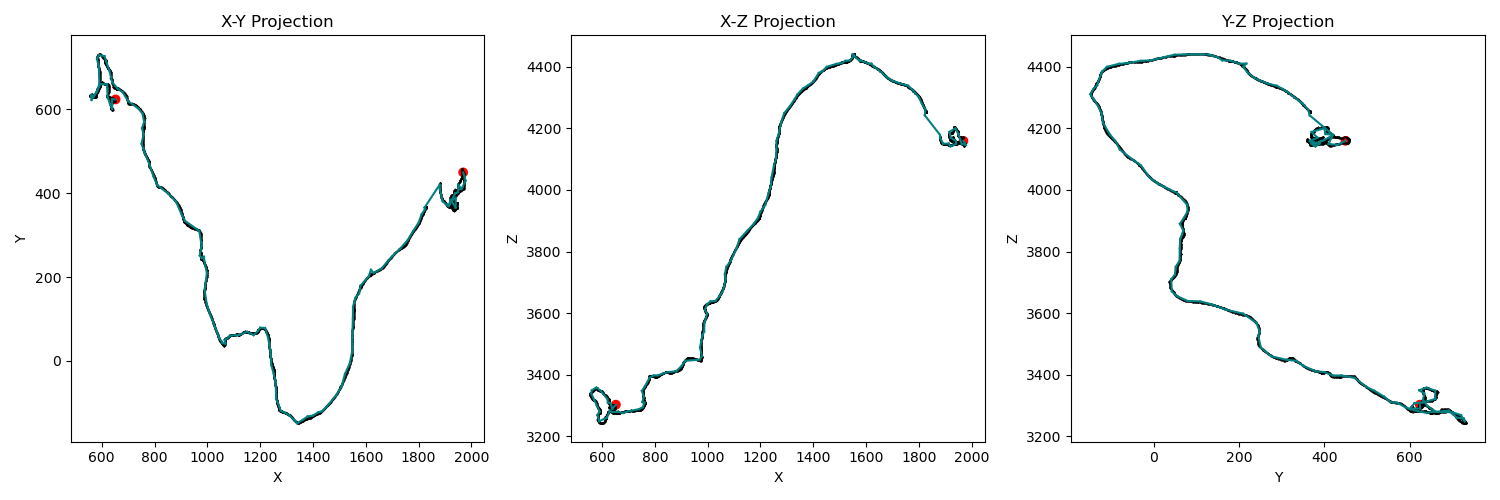

In [83]:
# 3D event display
%matplotlib widget



print(len(Bkg_cut))


# evid = 26984036
evid= Bkg_cut[9]

event       = Bkg[Bkg.event_id == evid]
event.index = event.id
Track       = Bkg_Tracks[evid]
connection  = Bkg_connections[evid]
connection_count = Bkg_connection_counts[evid]
event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



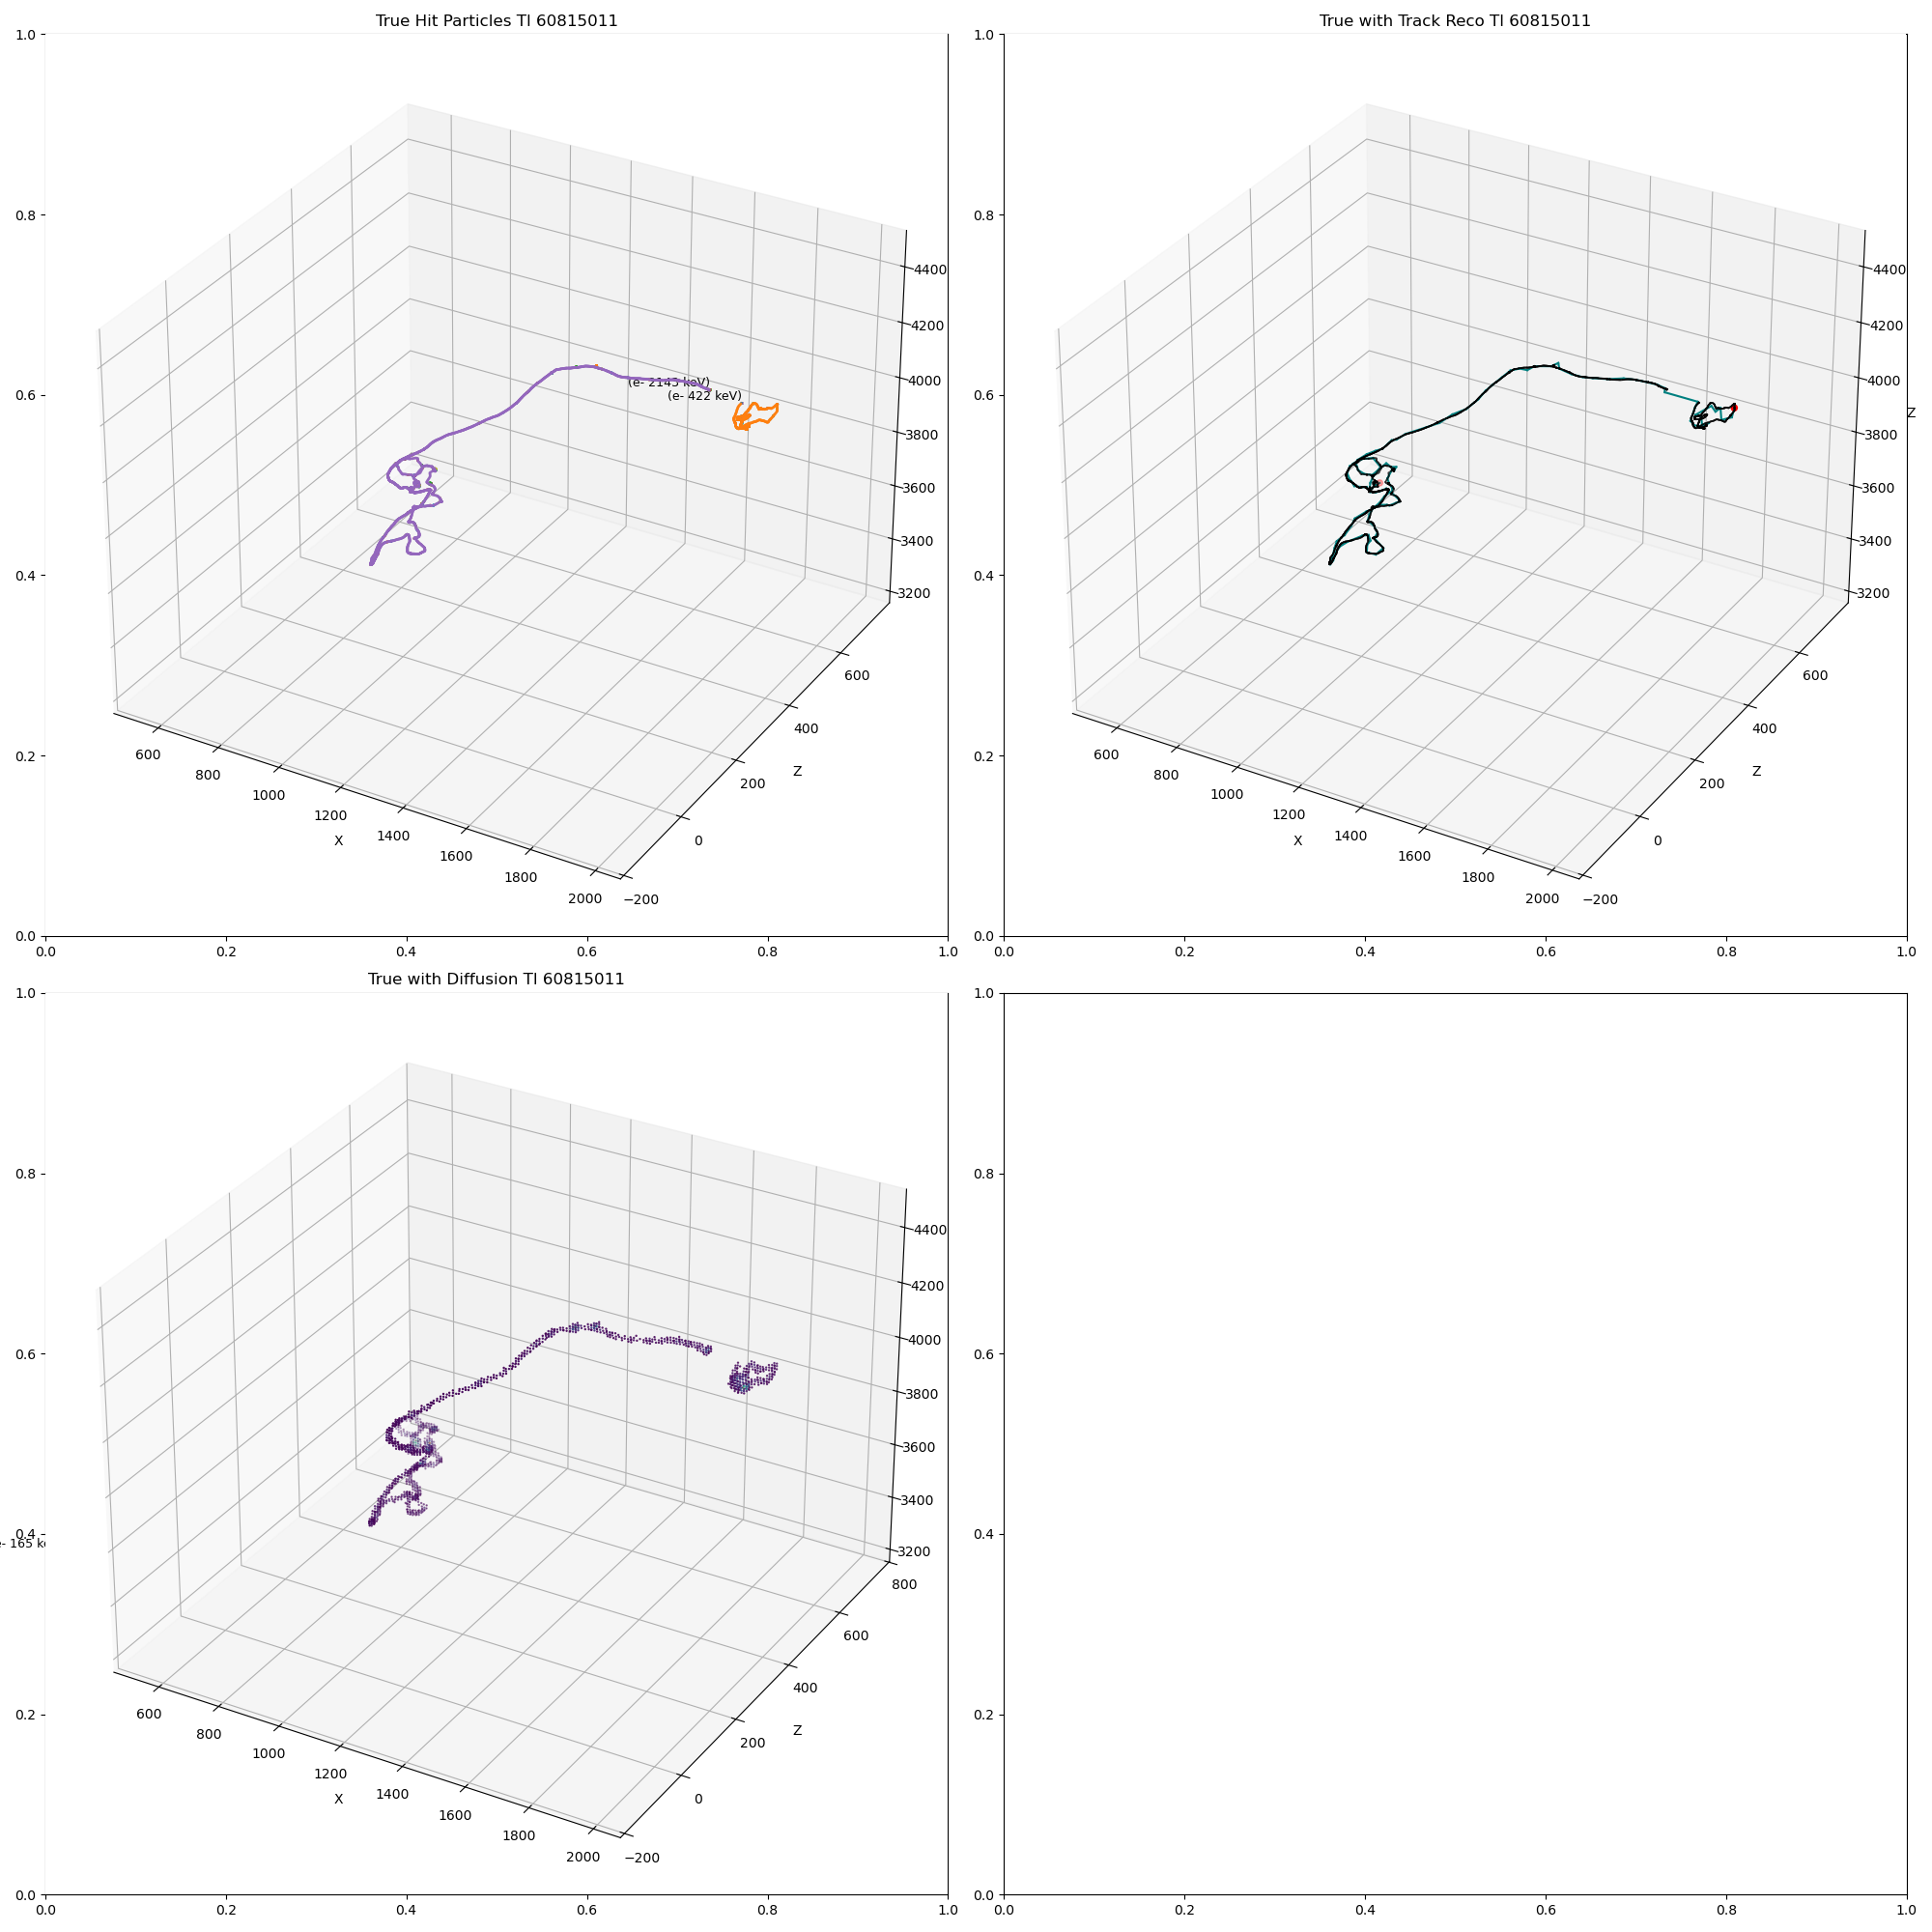

In [84]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(221, projection='3d')
for p in event_hits_true.particle_id.unique():

    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_title(f"True Hit Particles {event.Type.iloc[0]} {evid}")
ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_ylabel("Z")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_ylabel("Z")
ax2.set_title(f"True with Track Reco {event.Type.iloc[0]} {evid}")


event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_ylabel("Z")
ax3.set_title(f"True with Diffusion {event.Type.iloc[0]} {evid}")


plt.tight_layout()
plt.show()


In [72]:
display(event_parts_true[event_parts_true.kin_energy>0.1])
display(event_parts_true)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
15483,119685025,1,gamma,1,0,-801.426086,404.842010,-704.481079,0.000000,-3009.063965,...,1.461389,0.873036,1.965235,0.0,-0.0,0.0,2.600000,3590.243408,none,phot
15493,119685025,31,e-,0,1,-3009.063965,1666.909424,-1774.780396,11.975762,-3009.063477,...,-0.056486,-0.168184,-0.284559,0.0,0.0,0.0,0.100205,0.031704,phot,eIoni
15503,119685025,21,e-,0,1,-489.322083,532.283569,-393.170593,1.661324,-636.244263,...,0.781761,-0.186085,0.029874,-0.0,-0.0,0.0,0.441782,528.492554,compt,eIoni
15684,119685025,2,e-,0,1,-564.795898,546.205139,-386.267487,1.404290,838.122437,...,0.847353,0.993072,2.033333,-0.0,0.0,0.0,1.958770,3487.623047,compt,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
15483,119685025,1,gamma,1,0,-801.426086,404.842010,-704.481079,0.000000,-3009.063965,...,1.461389,0.873036,1.965235,0.0,-0.0,0.0,2.600000,3.590243e+03,none,phot
15484,119685025,35,e-,0,1,-3009.063965,1666.909424,-1774.780396,11.975762,-3009.063965,...,-0.002003,0.003040,0.005826,-0.0,0.0,0.0,0.000046,7.035860e-08,phot,msc
15485,119685025,34,e-,0,1,-3009.063965,1666.909424,-1774.780396,11.975762,-3009.063965,...,0.002311,-0.001407,-0.006000,0.0,-0.0,-0.0,0.000042,6.740963e-08,phot,msc
15486,119685025,33,e-,0,1,-3009.063965,1666.909424,-1774.780396,11.975762,-3009.063965,...,0.009270,-0.020410,-0.009845,0.0,-0.0,0.0,0.000586,6.825955e-06,phot,eIoni
15487,119685025,32,gamma,0,1,-3009.063965,1666.909424,-1774.780396,11.975762,-3009.076904,...,-0.002138,-0.005460,0.002469,-0.0,-0.0,0.0,0.006363,3.834098e-02,phot,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,119685025,602,e-,0,203,-547.090393,563.108826,-358.503143,1.541446,-547.090332,...,0.003384,-0.004487,-0.003996,0.0,0.0,-0.0,0.000047,1.188139e-04,eIoni,msc
16081,119685025,601,e-,0,203,-547.090393,563.108826,-358.503143,1.541446,-547.091125,...,-0.003161,-0.003622,0.000048,-0.0,-0.0,0.0,0.000023,1.998340e-03,eIoni,eIoni
16082,119685025,600,e-,0,203,-547.090393,563.108826,-358.503143,1.541446,-547.090271,...,0.000743,0.006559,0.001368,0.0,-0.0,0.0,0.000044,2.524363e-03,eIoni,msc
16083,119685025,599,e-,0,203,-547.090393,563.108826,-358.503143,1.541446,-547.092957,...,-0.010339,-0.018414,0.010848,-0.0,-0.0,0.0,0.000551,1.404880e-02,eIoni,eIoni


In [ ]:
# Save all the background events




# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


# def SaveInteractive3D(event_hits, filename):
#     fig = px.scatter_3d(event_hits, x='x', y='y', z='z', color='energy',
#                          title="3D Event Display", color_continuous_scale="Spectral")
    
#     fig.update_layout(scene=dict(
#         xaxis_title="X [mm]",
#         yaxis_title="Y [mm]",
#         zaxis_title="Z [mm]",
#         bgcolor='black',
#         xaxis=dict(
#             showbackground=False,  # Remove X plane
#             showgrid=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,  # Remove Y plane
#             showgrid=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,  # Remove Z plane
#             showgrid=False,
#             zeroline=False
#         ),
#     ))

#     pio.write_html(fig, filename)  # Save as interactive HTML file

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]

#     SaveInteractive3D(event, f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.html")

